In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)
plt.style.use('fivethirtyeight')
from datetime import timedelta
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from sklearn.preprocessing import *
import seaborn as sns

In [2]:
# Load First Dataset
data = pd.read_csv('QBElec.csv')
HUElec = pd.melt(data, id_vars=["Date"], var_name='time')
HUElec['time'] = pd.to_timedelta(HUElec['time'].apply(lambda t: f"{t[:5]}:00")) - timedelta(minutes=30)
HUElec['Date'] = pd.to_datetime(HUElec['Date'], format="%m/%d/%Y")
HUElec['Datetime'] = HUElec['Date'] + HUElec['time']
HUElec = HUElec.rename(columns={'value':'KW/h'})
HUElec = HUElec.set_index('Datetime')
HUElec = HUElec.drop(['Date', 'time'], axis=1).sort_index()

# View formatted data
HUElec.head()

,KW/h
Datetime,
2008-03-03 00:00:00,0.0
2008-03-03 00:30:00,0.0
2008-03-03 01:00:00,0.0
2008-03-03 01:30:00,0.0
2008-03-03 02:00:00,0.0


In [3]:
# Load Second Dataset
df = pd.read_csv('weather_features.csv', index_col='Date Time', parse_dates=True)
df.head()

,temp,dew_point,pressure,humidity,wind_speed
Date Time,,,,,
2008-01-01 00:00:00,7.38,6.79,1026,96,2.76
2008-01-01 01:00:00,6.49,6.05,1026,97,2.70
2008-01-01 02:00:00,6.45,6.01,1025,97,2.60
2008-01-01 03:00:00,6.74,6.45,1025,98,2.39
2008-01-01 04:00:00,6.64,6.35,1024,98,2.22


In [4]:
data1 = HUElec.copy()
data2 = df.copy()

first = data1.resample(rule='H').sum()
first.head(),data2.head()

(                     KW/h
 Datetime                 
 2008-03-03 00:00:00   0.0
 2008-03-03 01:00:00   0.0
 2008-03-03 02:00:00   0.0
 2008-03-03 03:00:00   0.0
 2008-03-03 04:00:00   0.0,
                      temp  dew_point  pressure  humidity  wind_speed
 Date Time                                                           
 2008-01-01 00:00:00  7.38       6.79      1026        96        2.76
 2008-01-01 01:00:00  6.49       6.05      1026        97        2.70
 2008-01-01 02:00:00  6.45       6.01      1025        97        2.60
 2008-01-01 03:00:00  6.74       6.45      1025        98        2.39
 2008-01-01 04:00:00  6.64       6.35      1024        98        2.22)

In [5]:
data2 = data2.loc['2008-03-03':]
data2

,temp,dew_point,pressure,humidity,wind_speed
Date Time,,,,,
2008-03-03 00:00:00,6.34,2.97,1009,79,6.72
2008-03-03 01:00:00,5.50,2.50,1009,81,6.82
2008-03-03 02:00:00,5.21,1.33,1010,76,6.75
2008-03-03 03:00:00,4.54,0.13,1010,73,6.58
2008-03-03 04:00:00,3.84,-0.32,1010,74,6.55
...,...,...,...,...,...
2022-03-01 19:00:00,6.67,4.83,1027,88,5.24
2022-03-01 20:00:00,6.30,4.62,1027,89,5.12
2022-03-01 21:00:00,6.10,4.43,1027,89,5.43


In [6]:
len(first)

122688

In [8]:
newData = first.join(data2)

In [63]:
newData.head()

,KW/h,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,
2008-03-03 00:00:00,0.0,6.34,2.97,1009,79,6.72
2008-03-03 01:00:00,0.0,5.50,2.50,1009,81,6.82
2008-03-03 02:00:00,0.0,5.21,1.33,1010,76,6.75
2008-03-03 03:00:00,0.0,4.54,0.13,1010,73,6.58
2008-03-03 04:00:00,0.0,3.84,-0.32,1010,74,6.55


In [65]:
newData.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='Datetime', length=122688)

In [62]:
newData.to_csv('QBElecWeather.csv')

<AxesSubplot:xlabel='Datetime', ylabel='temp'>

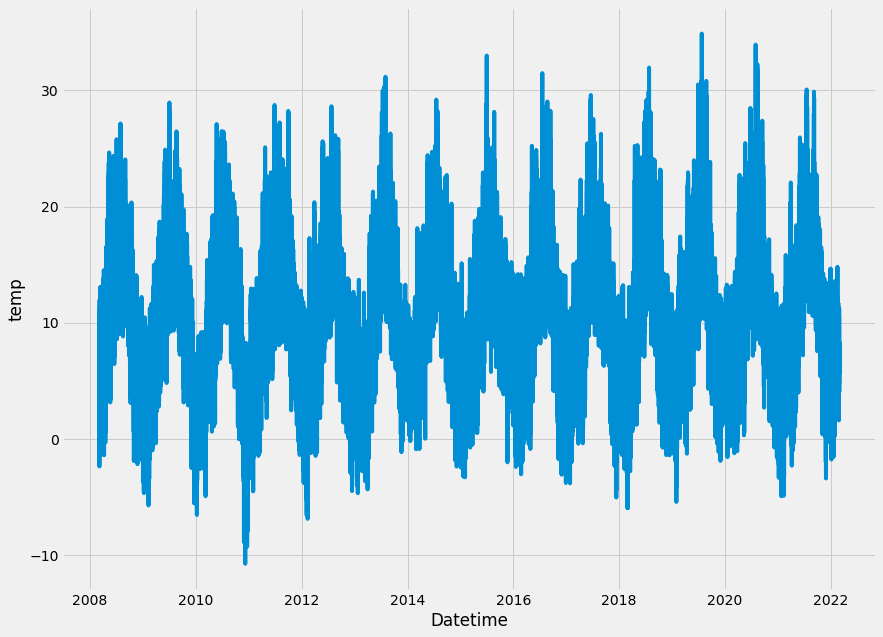

In [10]:
# sns.lineplot(x=newData.index, y=newData['KW/h'])
sns.lineplot(x=newData.index, y=newData.temp)

<AxesSubplot:xlabel='Date Time'>

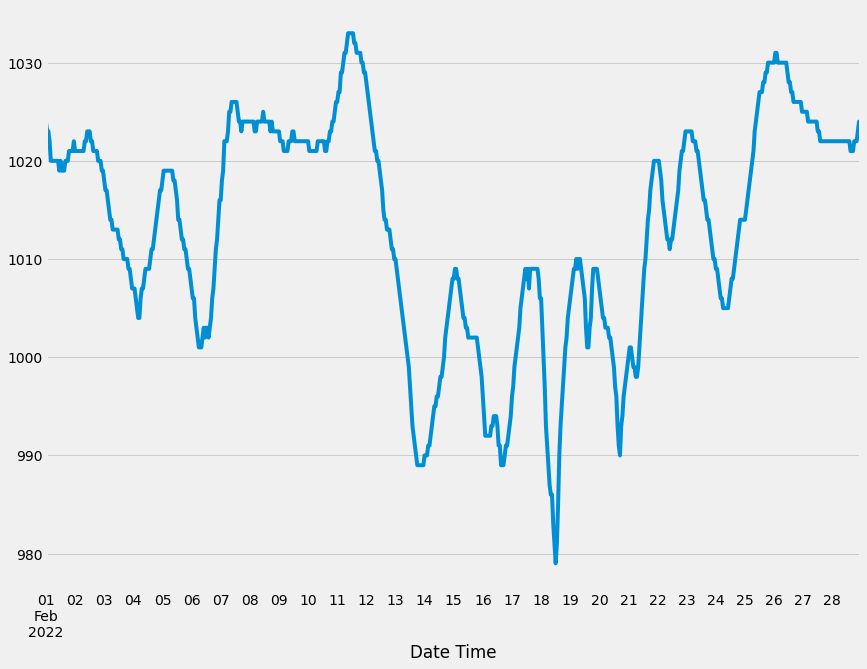

In [61]:
zoom = data2.loc['2022-02']

zoom['pressure'].plot()

<AxesSubplot:xlabel='Datetime'>

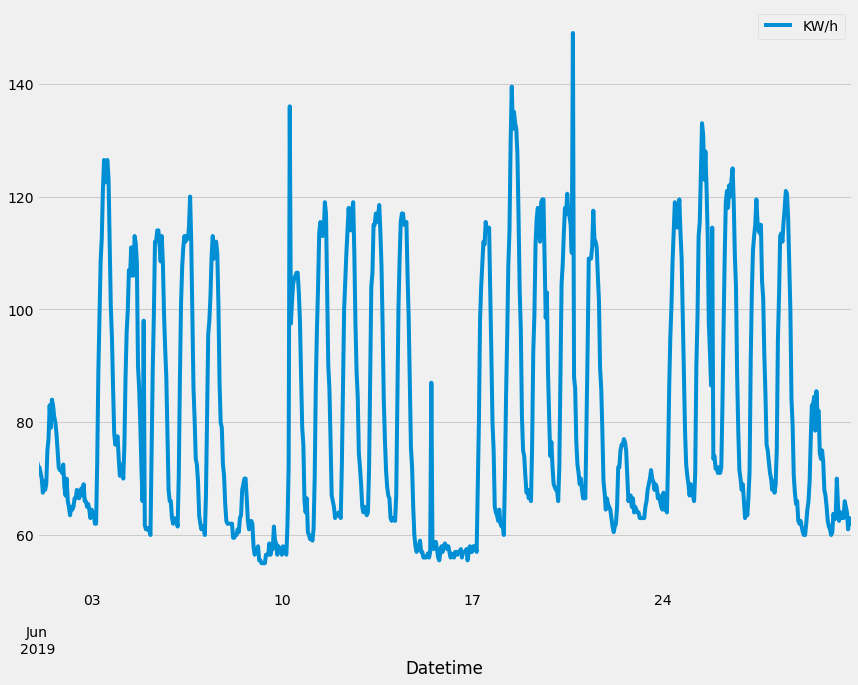

In [47]:
zoom = first.loc['2019-06']

zoom.plot()

<AxesSubplot:xlabel='Datetime', ylabel='KW/h'>

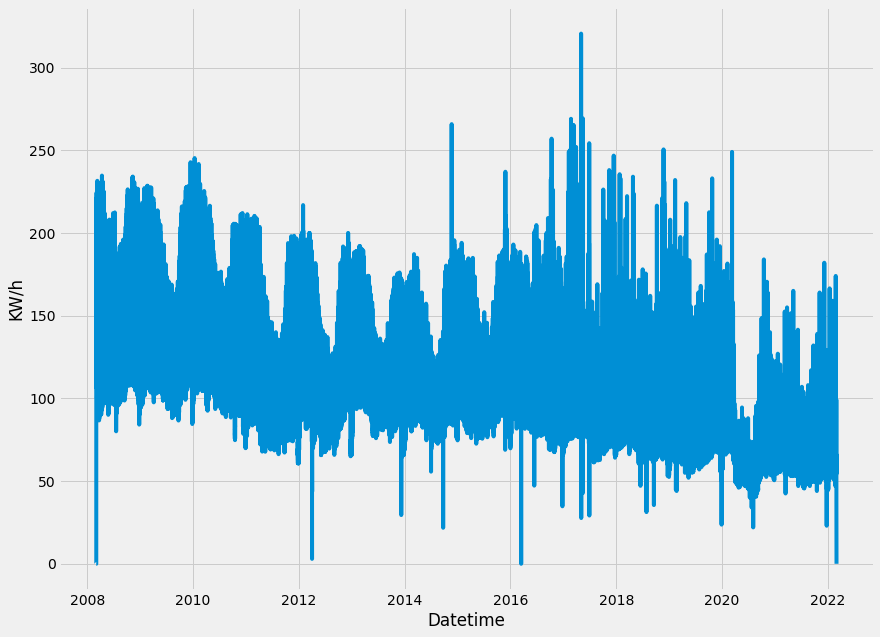

In [12]:
sns.lineplot(x=newData.index, y=newData['KW/h'])

In [22]:
newData.shape

(122688, 6)

<AxesSubplot:xlabel='Datetime'>

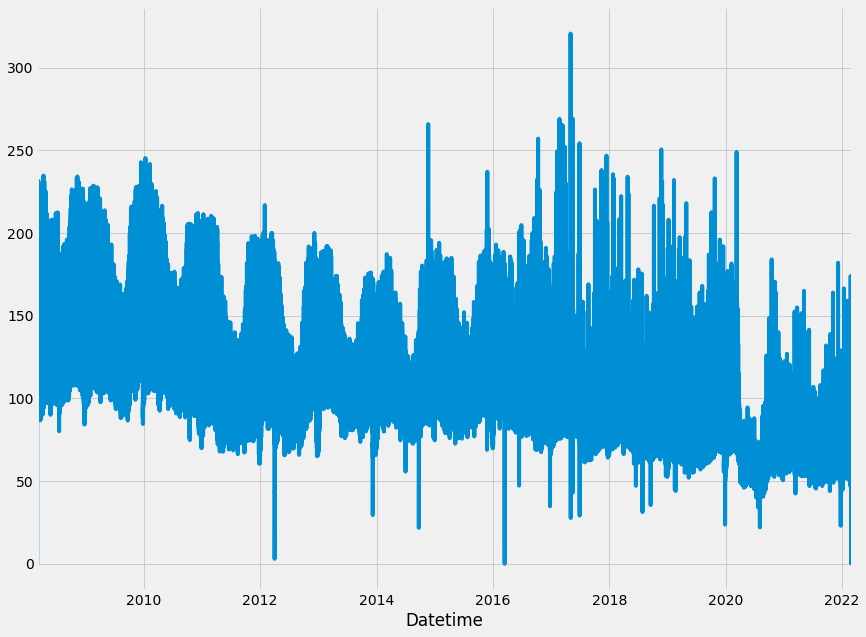

In [29]:
newData['KW/h'].plot()